### Load Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Sonar_Dataset.csv', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# Count Number of Rock ("R") and Mine ("M") 
data.iloc[:, -1].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [5]:
# Get the mean of the each column based on the label
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [6]:
# Separate the data and label
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [7]:
#Encode the label
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [8]:
# Split data into train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=1)


In [9]:
x_train.shape, x_test.shape

((187, 60), (21, 60))

### Training Model

#### Logistic Regression

In [10]:
#1st Method - Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [11]:
#training data
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
#Evaluate Model
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, model.predict(x_test))
print("accuracy : {:.2f}%".format(score * 100))

accuracy : 76.19%


In [13]:
from sklearn.model_selection import cross_val_score

score_1_crossval = cross_val_score(model, x_train, y_train, cv=5)
print(score_1_crossval)
print("Overall Score : {:.2f}%".format(score_1_crossval.mean() * 100))

[0.78947368 0.78947368 0.89189189 0.75675676 0.72972973]
Overall Score : 79.15%


In [14]:
def cross_val_manual(model, fold):
    fold_range = len(x_train) // fold
    scores = []
    for i in range(fold):
        # Split training set to folds
        x_train_cross, x_test_cross =  np.concatenate([x_train[:i * fold_range] , x_train[(i + 1) * fold_range:]]) , x_train[i * fold_range:(i + 1) * fold_range]
        y_train_cross, y_test_cross =  np.concatenate([y_train[:i * fold_range] , y_train[(i + 1) * fold_range:]]) , y_train[i * fold_range:(i + 1) * fold_range]
        # training using model_2
        model.fit(x_train_cross, y_train_cross)
        # Define prediction and compare with truth value
        model_2_cross_pred = model.predict(x_test_cross)
        score = accuracy_score(y_test_cross, model_2_cross_pred)
        scores.append(score)
    return np.array(scores)

model_1_cross = cross_val_manual(model, 5)  # Number of folds
print(model_1_cross)
print("Accuracy : {:.2f}%".format(model_1_cross.mean() * 100))

[0.75675676 0.83783784 0.86486486 0.75675676 0.72972973]
Accuracy : 78.92%


#### Neural Network

In [15]:
#2nd Method - Deep Learning
import tensorflow as tf
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(2),
])

In [16]:
model_2.compile(
    optimizer="adam",
    loss="binary_crossentropy",
)

In [17]:
history = model_2.fit(x_train, y_train, epochs=10)

Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 2.4838
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 1.7960
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 1.5062
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 1.3346
Epoch 5/10
6/6 [==============================] - 0s 2ms/step - loss: 1.2218
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 1.1257
Epoch 7/10
6/6 [==============================] - 0s 2ms/step - loss: 1.0349
Epoch 8/10
6/6 [==============================] - 0s 2ms/step - loss: 0.9719
Epoch 9/10
6/6 [==============================] - 0s 2ms/step - loss: 0.8775
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 0.8352


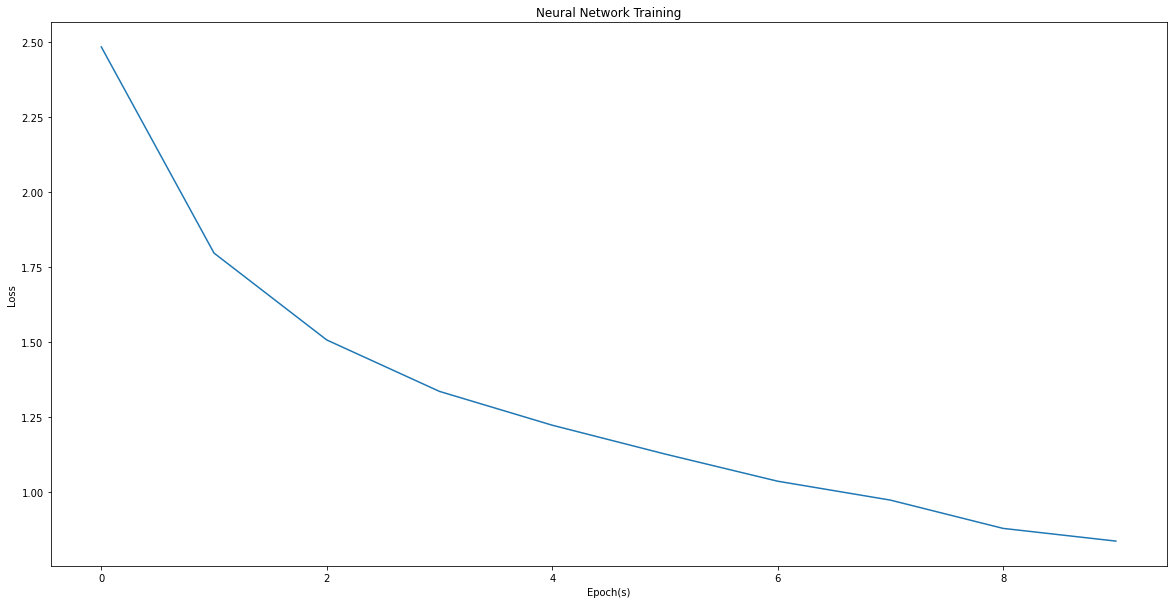

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
plt.xlabel("Epoch(s)")
plt.ylabel("Loss")
plt.title("Neural Network Training")
plt.plot(history.epoch, history.history['loss'])

In [19]:
model_2_pred = model_2.predict(x_test)
result = [np.argmax(subarray) for subarray in model_2_pred]
result

1/1 [==============================] - 0s 108ms/step


[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0]

In [20]:
score_2 = accuracy_score(y_test, result)
print("Accuracy : {:.2f}%".format(score_2*100))

Accuracy : 42.86%


In [21]:
def cross_val_nn(fold):
    fold_range = len(x_train) // fold
    scores = []
    for i in range(fold):
        # Split training set to folds
        x_train_cross, x_test_cross =  np.concatenate([x_train[:i * fold_range] , x_train[(i + 1) * fold_range:]]) , x_train[i * fold_range:(i + 1) * fold_range]
        y_train_cross, y_test_cross =  np.concatenate([y_train[:i * fold_range] , y_train[(i + 1) * fold_range:]]) , y_train[i * fold_range:(i + 1) * fold_range]
        # training using model_2
        model_2.fit(x_train_cross, y_train_cross, epochs=10, verbose=0)
        # Define prediction and compare with truth value
        model_2_cross_pred = model_2.predict(x_test_cross)
        res = [np.argmax(subarray) for subarray in model_2_cross_pred]
        score = accuracy_score(y_test_cross, res)
        scores.append(score)
    return score

model_2_cross = cross_val_nn(5)  # Number of folds
print("Accuracy : {:.2f}%".format(model_2_cross.mean() * 100))

2/2 [==============================] - 0s 3ms/step
Accuracy : 54.05%


#### Decision Tree

In [22]:
from sklearn.tree import  DecisionTreeClassifier

model_3 = DecisionTreeClassifier()
#fit the training data to model
model_3.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
score_3 = accuracy_score(y_test, model_3.predict(x_test))
print("Accuracy : {:.2f}%".format(score_3 * 100))

Accuracy : 66.67%


In [24]:
score_3_cross = cross_val_score(model_3, x_train, y_train, cv=5)
print("Accuracy : {:.2f}%".format(score_3_cross.mean() * 100))

Accuracy : 75.89%


In [26]:
score_3_manual = cross_val_manual(model_3, 5)
print("Accuracy : {:.2f}%".format(score_3_manual.mean() * 100))

Accuracy : 75.14%


#### Naive Bayes

In [28]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [29]:
score_4 = accuracy_score(y_test, gnb.predict(x_test))
print("Accuracy : {:.2f}%".format(score_4*100))

Accuracy : 61.90%


In [32]:
#Cross validation (sklearn)
score_4_cross = cross_val_score(gnb, x_train, y_train, cv=5)
print("Accuracy : {:.2f}%".format(score_4_cross.mean() * 100))

Accuracy : 71.71%


In [33]:
#Cross Validation (manual)
score_4_manual = cross_val_manual(gnb, 5)
print("Accuracy : {:.2f}%".format(score_4_manual.mean() * 100))

Accuracy : 71.89%


#### Support Vector Machine - SVM

In [35]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')  # Linear Kernel
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [36]:
score_5 = accuracy_score(y_test, svc.predict(x_test))
print("Accuracy : {:.2f}%".format(score_5*100))

Accuracy : 71.43%


In [37]:
#Cross validation (sklearn)
score_5_cross = cross_val_score(svc, x_train, y_train, cv=5)
print("Accuracy : {:.2f}%".format(score_5_cross.mean() * 100))

Accuracy : 75.96%


In [38]:
#Cross Validation (Manual)
score_5_manual = cross_val_manual(svc, 5)
print("Accuracy : {:.2f}%".format(score_5_manual.mean() * 100))

Accuracy : 77.30%
